In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
from os.path import join, exists
import xarray as xr
import namechange as nc

In [3]:
basepath = r'C:\Users\rakun\Dropbox\Github\superleprecon\data\spectrum\20201027'
ls = os.listdir(basepath)
os.listdir(basepath)

['He430000.nc',
 'He435000.nc',
 'He440000.nc',
 'He445000.nc',
 'He450000.nc',
 'He455000.nc',
 'He460000.nc',
 'He465000.nc',
 'He470000.nc',
 'He475000.nc']

In [4]:
nc.namechange(basepath, "Hentai", "He")

In [5]:
rcParams['font.size'] = 20

Text(0, 0.5, 'intensity')

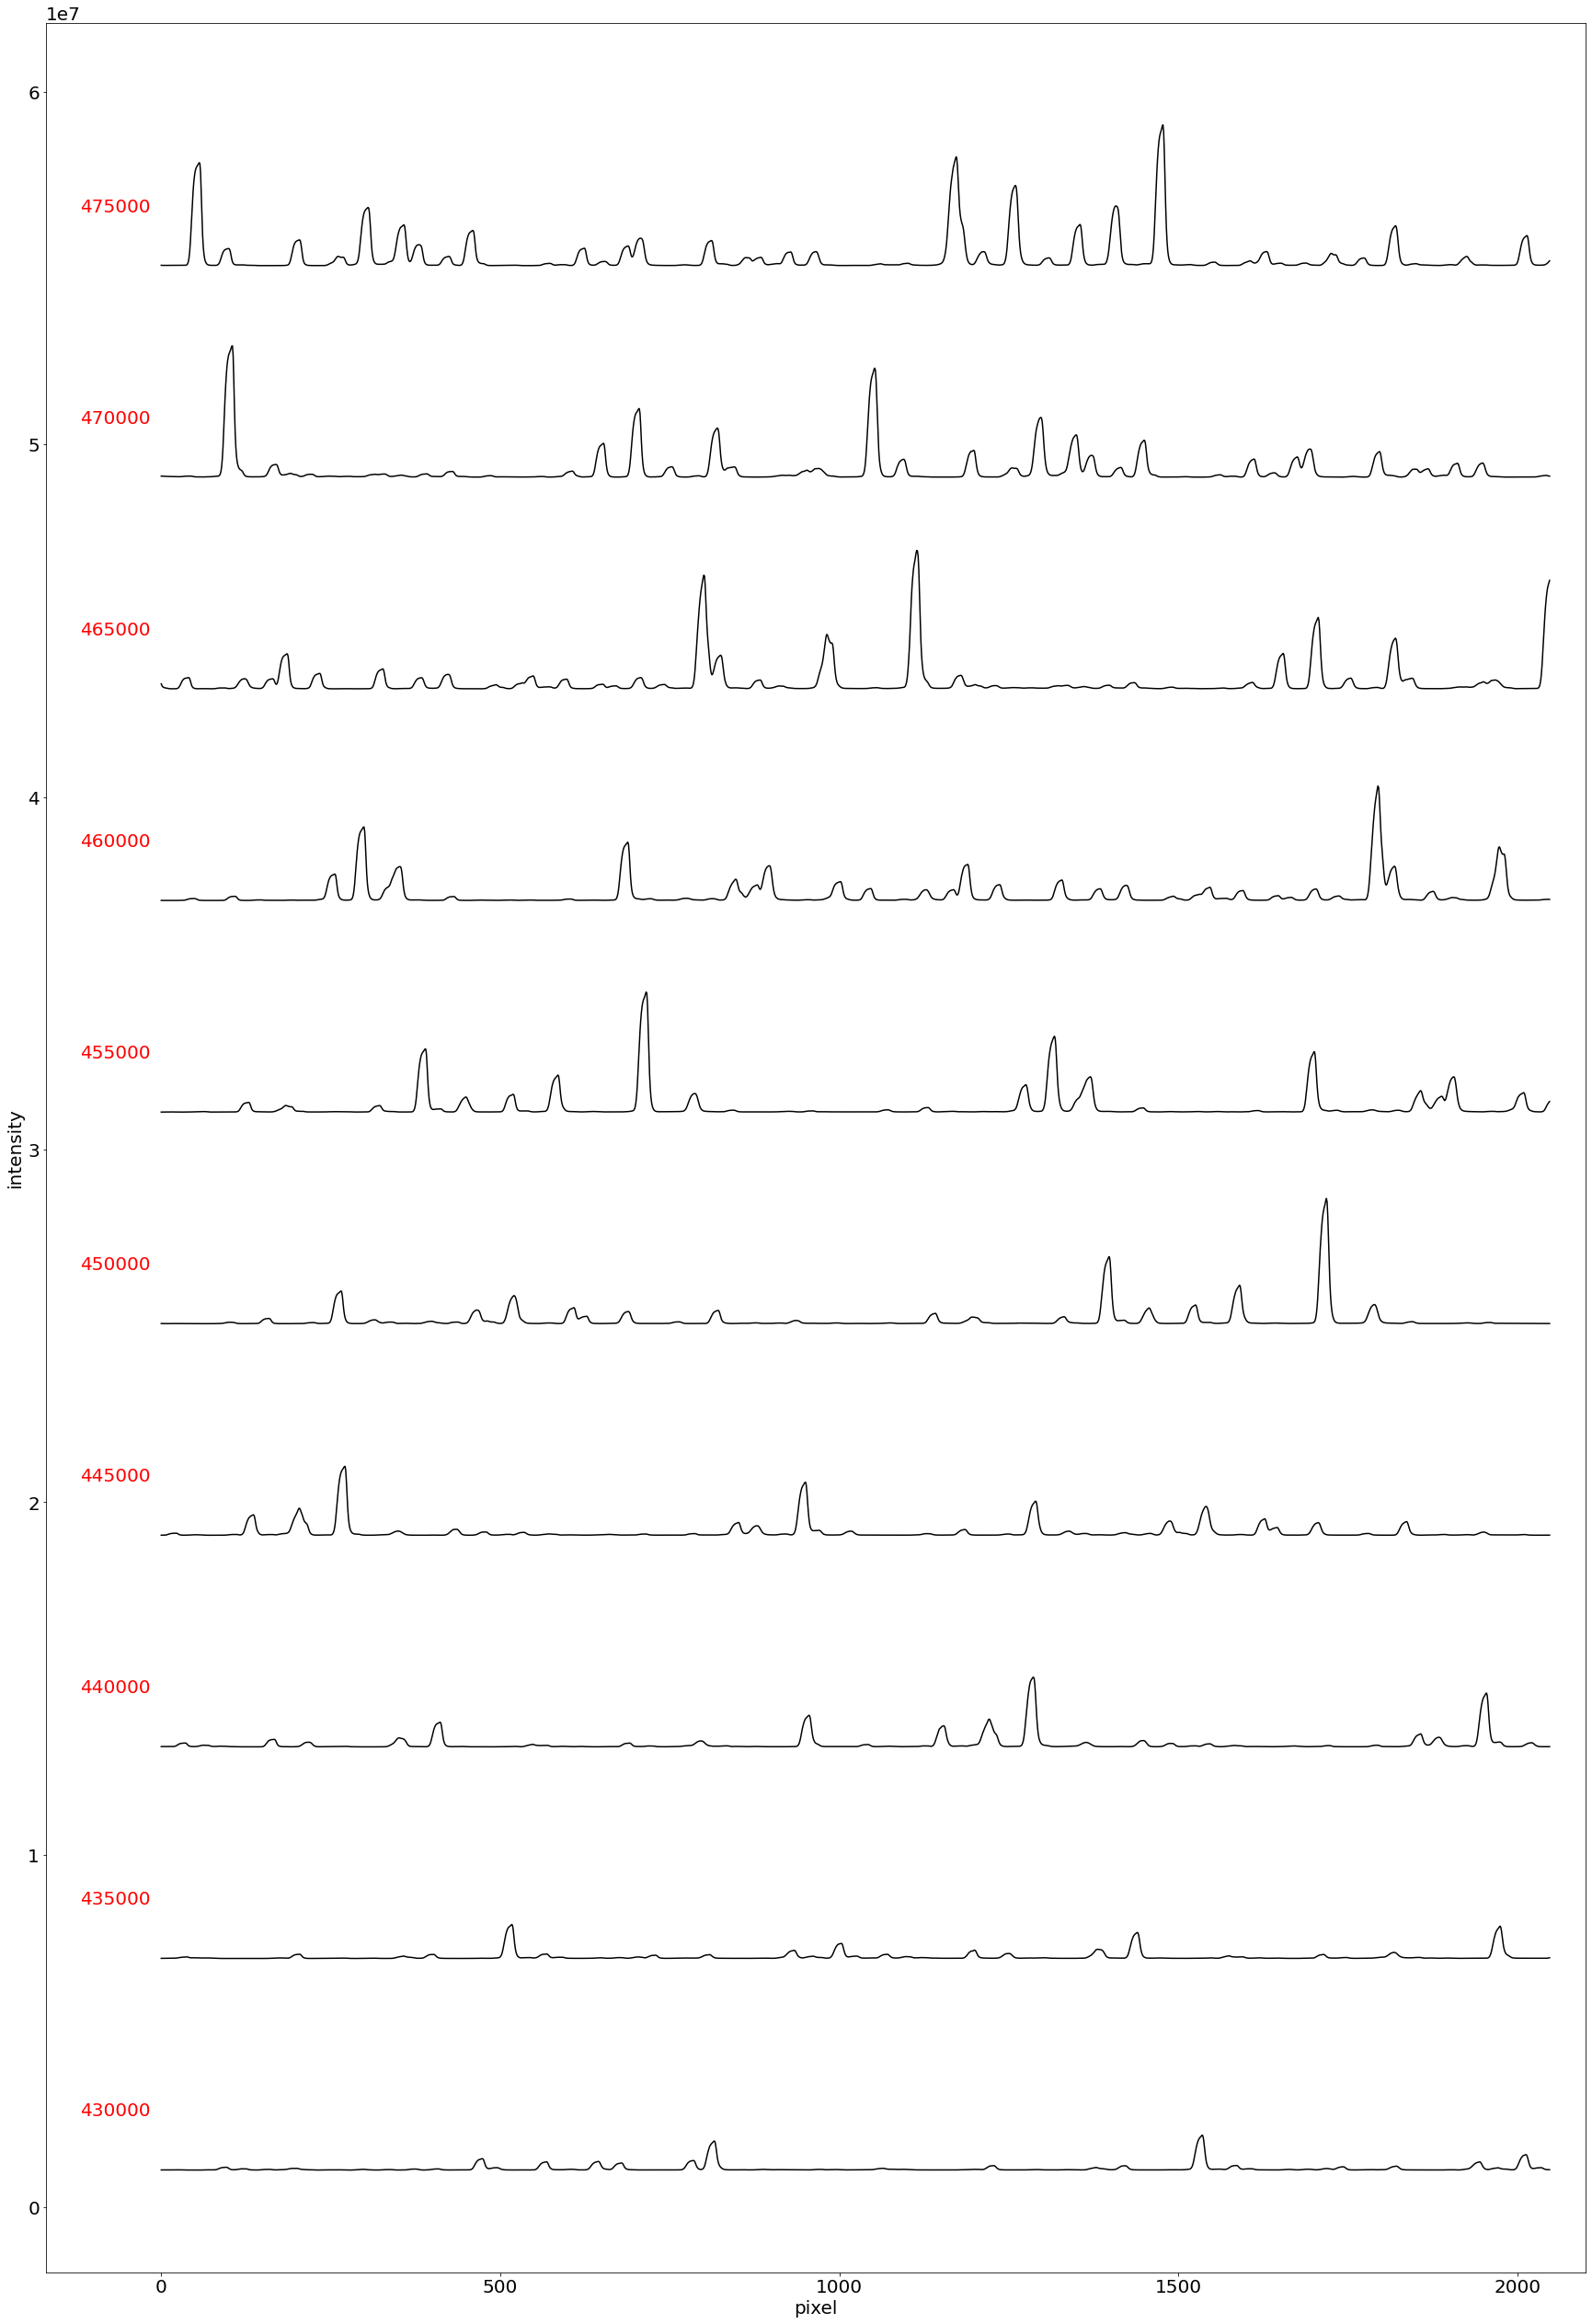

In [6]:
ls = sorted(os.listdir(basepath))
ls = [i for i in ls if '.nc' in i]
ls = [i for i in ls if 'He' in i]
step = 6e6
fig=gcf()
# 背景を白に設定
fig.set_facecolor('w')
fig.set_size_inches([30,45])

#ファイルが選択され、
for i,f in enumerate(ls):
    #ファイルにパスが付けられ、
    fp = join(basepath, f)
    #xarrayの機能でncファイルを読み込み、
    data = xr.open_dataset(fp)
    #image_dataに512*2048の２次元配列を代入し、
    image_data = data.to_array()[0]
    #i*step分だけ上にずらしている。'k'で強制的にすべて黒にしている。
    plot(image_data.sum(axis=0)+i*step, 'k')

data.close()
#左軸の数字を記入している。
[text(-120,2.6e6+i*step,t[2:-3],color='r') for i,t in enumerate(ls)]

xlim(-170,2100)
xlabel('pixel')
ylabel('intensity')
#savefig('../img/hespectra.pdf',dpi=200,bbox_inches='tight')

In [7]:
#1*512*2048の３次元データであることがわかる。
data.to_array()[0]

<xarray.DataArray (y: 512, x: 2048)>
array([[2100, 2100, 2109, ..., 2300, 2301, 2348],
       [2095, 2110, 2084, ..., 2273, 2295, 2321],
       [2114, 2094, 2097, ..., 2273, 2299, 2322],
       ...,
       [2136, 2128, 2140, ..., 2437, 2492, 2542],
       [2136, 2133, 2140, ..., 2391, 2482, 2543],
       [2182, 2191, 2172, ..., 2690, 2813, 2908]], dtype=uint16)
Coordinates:
    image_counter  int32 ...
    variable       <U29 '__xarray_dataarray_variable__'
Dimensions without coordinates: y, x

In [8]:
#1*512*2048の３次元データであることがわかる。
data.to_array()

<xarray.DataArray (variable: 1, y: 512, x: 2048)>
array([[[2100, 2100, 2109, ..., 2300, 2301, 2348],
        [2095, 2110, 2084, ..., 2273, 2295, 2321],
        [2114, 2094, 2097, ..., 2273, 2299, 2322],
        ...,
        [2136, 2128, 2140, ..., 2437, 2492, 2542],
        [2136, 2133, 2140, ..., 2391, 2482, 2543],
        [2182, 2191, 2172, ..., 2690, 2813, 2908]]], dtype=uint16)
Coordinates:
    image_counter  int32 ...
  * variable       (variable) <U29 '__xarray_dataarray_variable__'
Dimensions without coordinates: y, x